## zie lab5 van vorig jaar 

In [6]:
import cv2 as cv 
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [34]:
def to_screen(name, file):
    cv.imshow(name, file)  
    cv.waitKey(0)
    cv.destroyAllWindows()  

In [ ]:
cv.destroyAllWindows()  

### Assignment 1


In [32]:
building = cv.imread("../afbeeldingen/building.png")
sobel_building = building.copy()
# naar_scherm("building", building)


gray = cv.cvtColor(sobel_building, cv.COLOR_BGR2GRAY)

scale = 1
delta = 0
ddepth = cv.CV_32F

## horziontal first order derivative
grad_x = cv.Sobel(gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)

## do not forget to take abs because negative values!
abs_grad_x = cv.convertScaleAbs(grad_x)
clipped = np.clip(abs_grad_x,0,255)
grad_uint8 = clipped.astype("uint8")


# print(grad_uint8.dtype)
to_screen("sobel", grad_uint8)

cv.imwrite('./resultaten_lab2/ass1.png', grad_uint8)


True

### Assignment 2

In [160]:
rays = cv.imread("../afbeeldingen/rays.png")
to_screen("rays", rays)

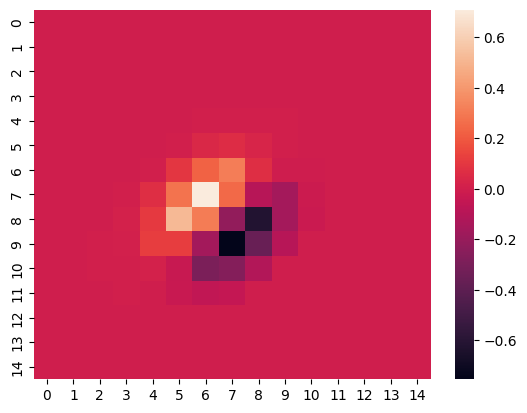

In [146]:


### step 1

# Creates a 1-D Gaussian kernel with sigma = 1
kernel = cv.getGaussianKernel(15, 1, cv.CV_32F)
square = np.zeros((15,15), dtype="float32")
square[7,:] = kernel.flatten()
# ax = sns.heatmap(square)
# plt.show()

### step 2
kernel2 = cv.getGaussianKernel(15, 0.6, cv.CV_32F)
filter = cv.filter2D(square, -1, kernel2)


# ax = sns.heatmap(filter)
# plt.show()

### step 3
dog = cv.Sobel(filter, ddepth, 0, 1, ksize=3)

# ax = sns.heatmap(dog)
# plt.show()

### step 4
M = cv.getRotationMatrix2D((8, 8), 45, 1)
rows,cols = dog.shape
img_output_ingebouwd = cv.warpAffine(dog, M, (cols,rows))

ax = sns.heatmap(img_output_ingebouwd)
plt.show()


In [141]:
# Tip: to visualize 
# floating point arrays like the DoG filter, rescale the values to [-0.5, 0.5] and add 0.5 to
# them so that black represents negative, gray zero, and white positive values.

# Normalised [-1,1]
normalised = 2.*(img_output_ingebouwd - np.min(img_output_ingebouwd))/np.ptp(img_output_ingebouwd)-1
print(np.amax(normalised))

# [-0.5, 0.5]
normalised_half  = normalised * 0.5
print(np.amax(normalised_half))

normalised_added = normalised_half + 0.5

# normalised_casted = normalised_added.astype("uint8")
to_screen("dog_normalised", normalised_added)
cv.imwrite('./resultaten_lab2/ass2.tiff', normalised_added)


1.0
0.5


True

### Assignment 3 

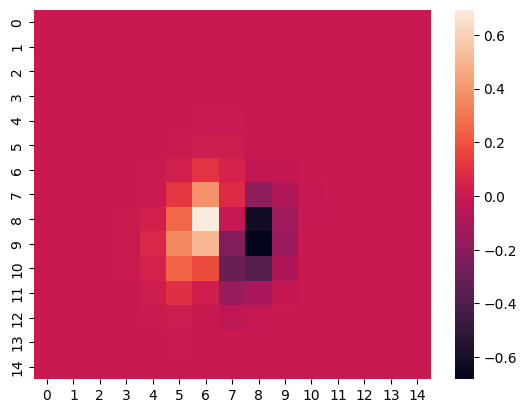

In [156]:
## 75 degrees instead of 45
M2 = cv.getRotationMatrix2D((8, 8), 75, 1)
yellow_strips_filter = cv.warpAffine(dog, M2, (cols,rows))

ax = sns.heatmap(yellow_strips_filter)
plt.show()

yellow_strips = rays.copy()
result_yellow_strips = cv.filter2D(yellow_strips, -1, yellow_strips_filter)
abs_strips = cv.convertScaleAbs(result_yellow_strips)

clipped_strips = np.clip(abs_strips,0,255)
strips_uint8 = clipped_strips.astype("uint8")
to_screen("result_strips", strips_uint8)


### Assignment 4

In [182]:
canny = rays.copy()
edges = cv.Canny(canny,100,100)
to_screen("canny_edges", edges)
cv.imwrite('./resultaten_lab2/ass4.png', normalised_added)

True

### Assignment 5

In [ ]:
painting4 = cv.imread("../afbeeldingen/painting4.jpg")
to_screen("painting", painting4)

In [183]:
canny_painting = painting4.copy()
edges_painting = cv.Canny(canny_painting,800,400)
to_screen("canny_edges_paiting", edges_painting)
cv.imwrite('./resultaten_lab2/ass5.png', normalised_added)

True

### Assignment 6